# Install Necessary Libraries

In [1]:
!pip install keras
!pip install opencv-contrib-python
!pip install pillow

# Library Imports

In [0]:
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import drive
from keras.models import load_model
import json

# Mounting google drive in colab

In [8]:
drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Define Parameters here

In [0]:
input_layer_shape = (224, 224, 3)
drive_weights_path = "/content/drive/My Drive/VGG16 Visualization/weights.h5"
imagenet_labels_file_path = "/content/drive/My Drive/VGG16 Visualization/imagenet_class_index.json"
image_name = "/content/drive/My Drive/beer.png"
num_classes = 1000


# **Part 1 - Predictions from model**


# Load pretrained VGG16 weights and model

### Load Model

In [10]:
trained_model = load_model(drive_weights_path)

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [0]:
trained_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

# Create VGG16 Model using Keras Functional APIs

In [0]:
input_layer = Input(shape=input_layer_shape)

# Block 1
block1_conv1 = Conv2D(64, (3,3), activation="relu", padding="same", name="block1_conv1")(input_layer)
block1_conv2 = Conv2D(64, (3,3), activation="relu", padding="same", name="block1_conv2")(block1_conv1)
block1_pool = MaxPooling2D((2,2), strides=(2,2), name="block1_pool")(block1_conv2)

# Block 2
block2_conv1 = Conv2D(128, (3,3), activation="relu", padding="same", name="block2_conv1")(block1_pool)
block2_conv2 = Conv2D(128, (3,3), activation="relu", padding="same", name="block2_conv2")(block2_conv1)
block2_pool = MaxPooling2D((2,2), strides=(2,2), name="block2_pool")(block2_conv2)

# Block 3
block3_conv1 = Conv2D(256, (3,3), activation="relu", padding="same", name="block3_conv1")(block2_pool)
block3_conv2 = Conv2D(256, (3,3), activation="relu", padding="same", name="block3_conv2")(block3_conv1)
block3_conv3 = Conv2D(256, (3,3), activation="relu", padding="same", name="block3_conv3")(block3_conv2)
block3_pool = MaxPooling2D((2,2), strides=(2,2), name="block3_pool")(block3_conv3)

# Block 4
block4_conv1 = Conv2D(512, (3,3), activation="relu", padding="same", name="block4_conv1")(block3_pool)
block4_conv2 = Conv2D(512, (3,3), activation="relu", padding="same", name="block4_conv2")(block4_conv1)
block4_conv3 = Conv2D(512, (3,3), activation="relu", padding="same", name="block4_conv3")(block4_conv2)
block4_pool = MaxPooling2D((2,2), strides=(2,2), name="block4_pool")(block4_conv3)

# Block 5
block5_conv1 = Conv2D(512, (3,3), activation="relu", padding="same", name="block5_conv1")(block4_pool)
block5_conv2 = Conv2D(512, (3,3), activation="relu", padding="same", name="block5_conv2")(block5_conv1)
block5_conv3 = Conv2D(512, (3,3), activation="relu", padding="same", name="block5_conv3")(block5_conv2)
block5_pool = MaxPooling2D((2,2), strides=(2,2), name="block5_pool")(block5_conv3)

#flatten features
flattened_features = Flatten(name="flatten")(block5_pool)

#fc1
fc1 = Dense(4096, activation="relu", name="fc1")(flattened_features)

#fc2
fc2 = Dense(4096, activation="relu", name="fc2")(fc1)

#prdictions layer
predictions = Dense(num_classes, activation="softmax", name="predictions")(fc2)


In [0]:
model = Model(input_layer, predictions)

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

# Copy Weights from trained model to our model

In [0]:
model.set_weights(trained_model.get_weights())

# Load an Image

### Read Image in numpy array

In [0]:
target_size = (224, 224)

In [0]:
sample_image = cv2.resize(cv2.imread(image_name), target_size)
print("Image Shape : ", sample_image.shape)
print("Min Value in Image array : ", sample_image.min())
print("Max Value in Image array : ", sample_image.max())

Image Shape :  (224, 224, 3)
Min Value in Image array :  0
Max Value in Image array :  255


### Plot image

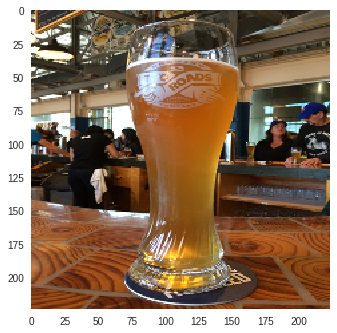

In [0]:
plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))
plt.grid(False)
plt.show()

# Sample of prediction

### Get imagenet labels

In [0]:
with open(imagenet_labels_file_path, "r") as handle:
  labels_dict = json.load(handle)

In [0]:
probs = model.predict(np.expand_dims(sample_image,axis=0))

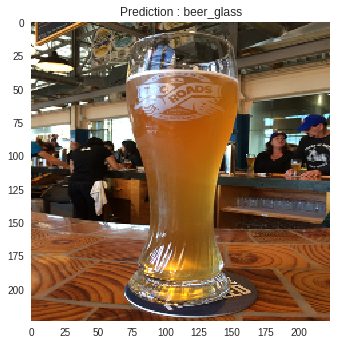

In [0]:
plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))
plt.grid(False)
plt.title("Prediction : %s"%(labels_dict[str(probs.argmax(axis=1)[0])][1]))
plt.show()

# **Part 2 - Visualizing feature maps **

### Define layer variable to visualize

In [0]:
end_layer = block1_conv1

### Trimmed Model

In [0]:
sub_model = Model(input_layer, end_layer)
print(sub_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
None


### Get number channels

In [0]:
layer_out = np.squeeze(sub_model.predict(np.expand_dims(sample_image, axis=0)), axis=0)
num_features_maps = layer_out.shape[2]
width_feature_maps = layer_out.shape[1]
height_feature_maps = layer_out.shape[0]

print("Num feature maps : ", num_features_maps)
print("Width of feature maps : ", width_feature_maps)
print("Height of feature maps : ", height_feature_maps)

Num feature maps :  64
Width of feature maps :  224
Height of feature maps :  224


In [0]:
num_rows = 8
num_cols = int(num_features_maps/8)

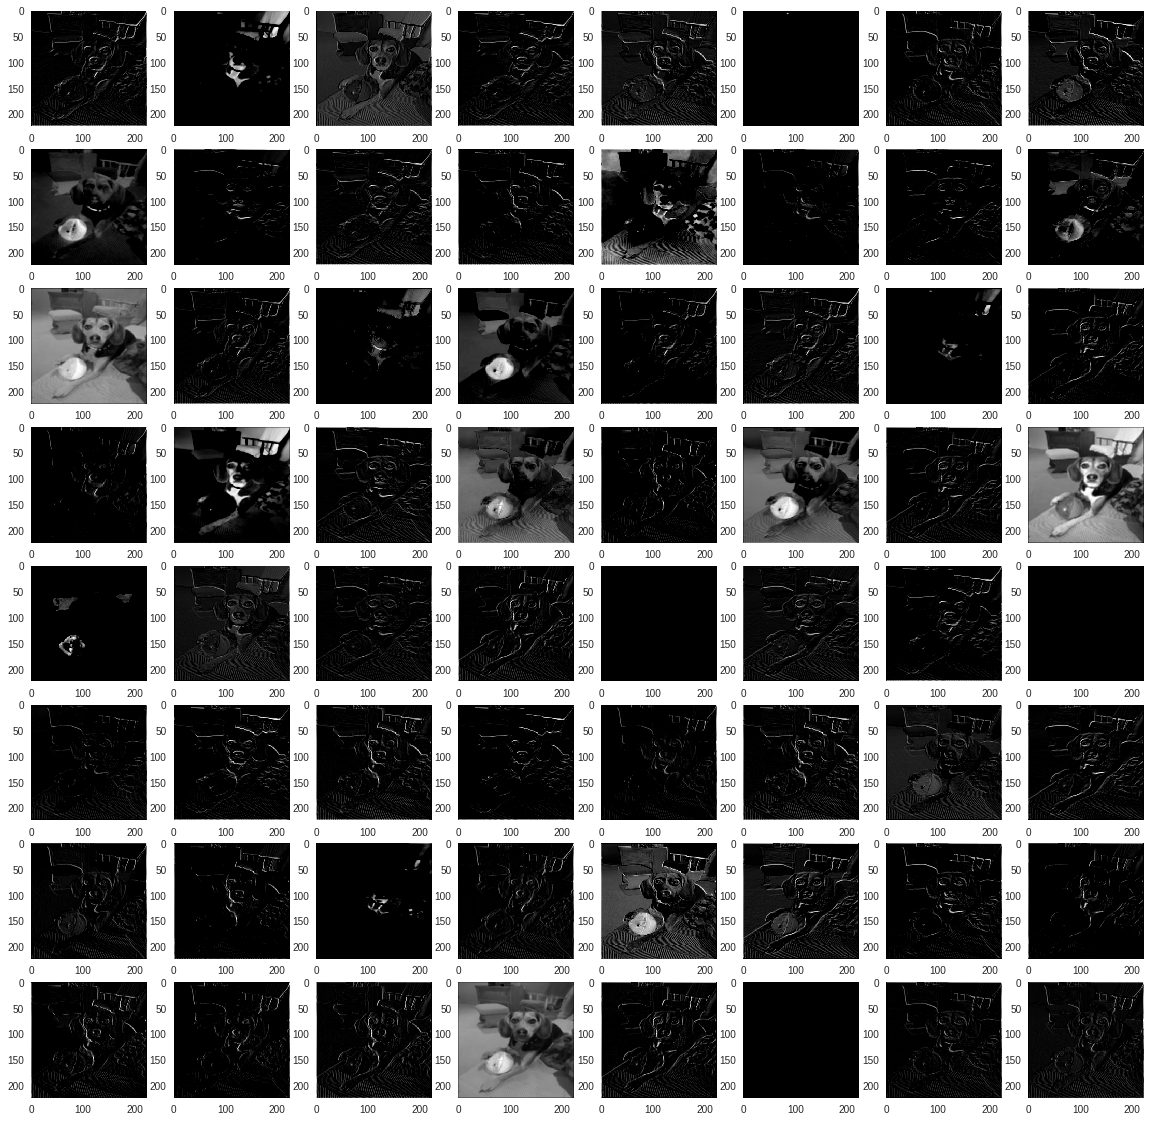

In [0]:
fig, ax = plt.subplots(nrows=num_rows,ncols=num_cols)
fig.set_figwidth(20)
fig.set_figheight(20)

index = 0
for row in ax:
  for col in row:
    col.grid(False)
    col.imshow(layer_out[:, : , index],cmap="gray")
    index +=1

### Define feature map index

In [0]:
findex = 15

### Feature map plot

In [0]:
plt.grid(False)
plt.imshow(layer_out[:, : ,findex],cmap="gray")
plt.show()